<a href="https://colab.research.google.com/github/TAUforPython/denoising/blob/main/Denoising_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# устанавливаем библиотеки 
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# случайный сигнал

# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0 
t = np.linspace(0.0, T, N)

y_clean = np.sin(3.0 * 2.0*np.pi*t) + 0.5*np.sin(15.0 * 2.0*np.pi*t)
y = y_clean + np.random.normal(0, scale=0.5, size=len(t))


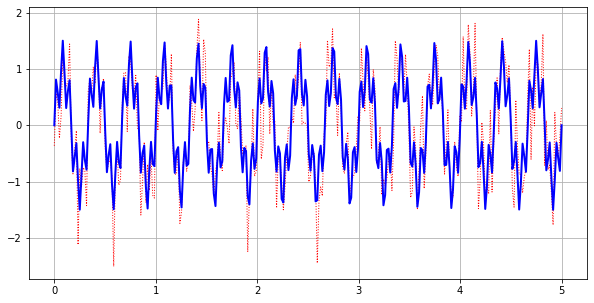

In [10]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, y, color = 'red', linestyle = ':', linewidth = 1,)
plt.plot(t, y_clean, color = 'blue', linestyle = '-', linewidth = 2)
plt.grid()
plt.show()

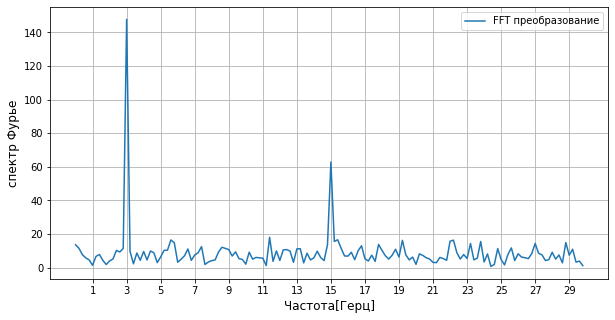

In [11]:
from scipy.fft import fft, fftfreq

yf = fft(y)
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2]),label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(1, np.max(xf), 2))
plt.grid()
plt.legend()
plt.show()

In [12]:
n = len(t)
y_hat = np.fft.fft(y, n)
PSD = y_hat * np.conj(y_hat) / n
dt = 1/N
freq = (1/(dt*n)) * np.arange(n) #xf?
L = np.arange(1, np.floor(n/2), dtype = 'int')

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


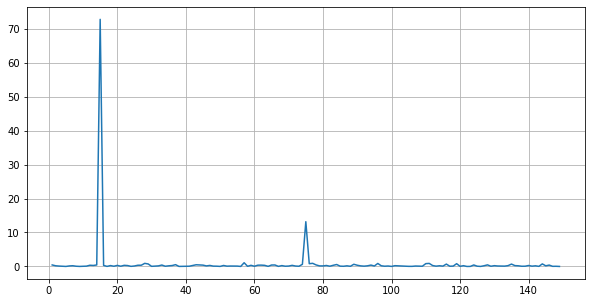

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(freq[L], PSD[L])
plt.grid()

In [15]:
indices = PSD > 5 #ищем все частоты, для которых PSD больше, чем 60
PSD_clean = PSD * indices
y_hat = indices * y_hat
y_filtered = np.fft.ifft(y_hat)

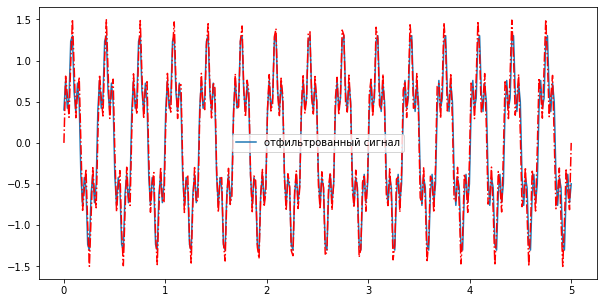

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(t, y_filtered, label = 'отфильтрованный сигнал')
#plt.plot(t, y_clean - y_filtered, label = 'разница между исходных и отфильтрованным')
plt.plot(t, y_clean, color = 'red', linestyle = '-.')
plt.legend()
plt.show()
plt.grid